In [80]:
# Imports
import os
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [81]:
# Load dataset
data = pd.read_csv("../data/02_engineered_data.csv")

In [82]:
data.head(10)

,WEIGHT,GENDER,NUMBER_OF_CHILDREN,AGE,HOUSEHOLD_SIZE,TV_TOTAL,FLYERS,PRINT_TOTAL,ONLINE_VIDEO,ONLINE_DISPLAY,...,DIGITAL_MEDIA_TOTAL,TRADITIONAL_MEDIA_TOTAL,SOCIAL_MEDIA_TOTAL,VIDEO_MEDIA_TOTAL,MEDIA_PER_HOUSEHOLD_MEMBER,MEDIA_PER_CHILD,AGE_GROUP,HEAVY_MEDIA_USER,ENGAGED_VIDEO_USER,TARGET_GROUP
0,11032.10,MALE,0.0,28.0,2.0,0.0,0.0,0.0,10.0,4.0,...,14.0,0.0,0.0,10.0,7.000000,14.0,18-34,1,1,0
1,2581.77,FEMALE,0.0,52.0,2.0,0.0,0.0,1.0,0.0,0.0,...,2.0,1.0,2.0,2.0,1.500000,3.0,45-54,0,1,0
2,8219.48,MALE,1.0,38.0,3.0,4.0,0.0,0.0,0.0,0.0,...,1.0,4.0,1.0,1.0,1.666667,2.5,35-44,1,1,1
3,6040.79,MALE,2.0,38.0,4.0,0.0,0.0,0.0,11.0,2.0,...,39.0,0.0,26.0,12.0,9.750000,13.0,35-44,1,1,1
4,11635.16,MALE,0.0,28.0,2.0,0.0,0.0,0.0,7.0,3.0,...,10.0,0.0,0.0,7.0,5.000000,10.0,18-34,1,1,0
5,13456.38,FEMALE,0.0,27.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,18-34,0,0,0
6,3881.71,FEMALE,0.0,38.0,1.0,4.0,0.0,0.0,6.0,5.0,...,12.0,4.0,1.0,7.0,16.000000,16.0,35-44,1,1,1
7,3993.45,FEMALE,0.0,52.0,2.0,3.0,0.0,0.0,9.0,6.0,...,20.0,3.0,5.0,11.0,11.500000,23.0,45-54,1,1,0
8,6353.90,MALE,0.0,91.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.000000,1.0,75+,0,0,0
9,2966.01,MALE,0.0,69.0,2.0,81.0,3.0,1.0,0.0,0.0,...,0.0,85.0,0.0,0.0,42.500000,85.0,65-74,1,0,1


In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16048 entries, 0 to 16047
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   WEIGHT                      16048 non-null  float64
 1   GENDER                      16048 non-null  object 
 2   NUMBER_OF_CHILDREN          16048 non-null  float64
 3   AGE                         16048 non-null  float64
 4   HOUSEHOLD_SIZE              16048 non-null  float64
 5   TV_TOTAL                    16048 non-null  float64
 6   FLYERS                      16048 non-null  float64
 7   PRINT_TOTAL                 16048 non-null  float64
 8   ONLINE_VIDEO                16048 non-null  float64
 9   ONLINE_DISPLAY              16048 non-null  float64
 10  ONLINE_TOTAL                16048 non-null  float64
 11  TIKTOK                      16048 non-null  float64
 12  YOUTUBE_TOTAL               16048 non-null  float64
 13  YOUTUBE_MOBILE              160

In [84]:
# # Prepare data
# X = data[['AGE', 'GENDER', 'NUMBER_OF_CHILDREN', 'TOTAL_MEDIA_EXPOSURE']]
# y = data['PURCHASE']
# X = pd.get_dummies(X, drop_first=True)

# # Train/Test Split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train Model
# model = RandomForestClassifier(random_state=42)
# model.fit(X_train, y_train)

# # Evaluate
# y_pred = model.predict(X_test)
# print(classification_report(y_test, y_pred))
# print("ROC-AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

Purchase Rate: 49.59%


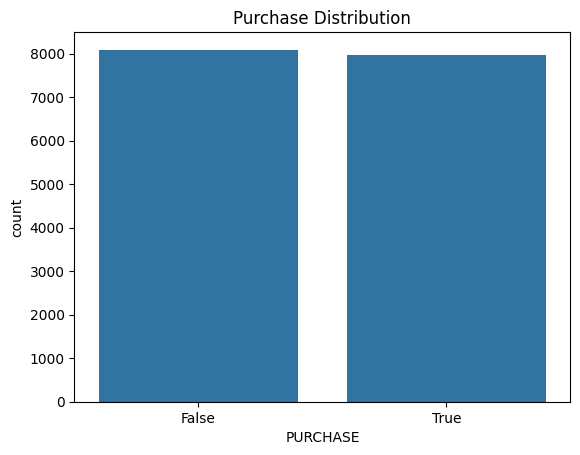

In [85]:
# Check purchase rate
purchase_rate = data['PURCHASE'].mean()
print(f"Purchase Rate: {purchase_rate:.2%}")

# Visualize class balance
sns.countplot(x='PURCHASE', data=data)
plt.title("Purchase Distribution")
plt.show()

## 1. Data Pre-Proccessing

In [86]:
# Get dummies for gender
data = pd.get_dummies(data, columns=['GENDER'], drop_first=True)  # Drops one category to avoid multicollinearity

In [87]:
unwanted_columns = [
    'WEIGHT',
    # 'NUMBER_OF_CHILDREN',
    # 'AGE',
    # 'HOUSEHOLD_SIZE',
    # 'TV_TOTAL',
    # 'FLYERS',
    # 'PRINT_TOTAL',
    # 'ONLINE_VIDEO',
    # 'ONLINE_DISPLAY',
    # 'ONLINE_TOTAL',
    # 'TIKTOK',
    # 'YOUTUBE_TOTAL',
    # 'YOUTUBE_MOBILE',
    # 'YOUTUBE_DESKTOP',
    # 'YOUTUBE_TABLET',
    # 'YOUTUBE_CTV',
    # 'PINTEREST',
    'PURCHASE',
    # 'GENDER_female',
    # 'GENDER_male',
    'TOTAL_MEDIA_EXPOSURE',
    'AGE_GROUP'
]


In [88]:
train_features = [
    'GENDER_male',
    'GENDER_female',
    'NUMBER_OF_CHILDREN',
    'AGE',
    'HOUSEHOLD_SIZE',
    'TOTAL_MEDIA_EXPOSURE'
]

In [120]:
# X = data[train_features]
X = data.drop(columns=unwanted_columns)  # Drop target, weights and unwanted columns
y = data['PURCHASE']  # Target variable
weights = data['WEIGHT']  # Store weights separately

# Check
X.shape, y.shape, weights.shape

((16048, 28), (16048,), (16048,))

#### Train/Test split

In [90]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(X, y, weights, test_size=0.20, random_state=42)

In [91]:
# from sklearn.model_selection import cross_val_score, cross_validate


# def model_evaluation(models: dict, X_train, y_train, w_train , metric):
#     """
#     This function uses Cross Validation to evaluate models' perfomence. Returns a report of the models' names and mean scores.
#     """

#     # scorer = make_scorer(roc_auc_score(y_true, y_pred, sample_weight=w_train), needs_proba=True)

#     evaluation_report = {}
#     for model_name, model in models.items():

#         # Only include sample_weight if the model supports it
#         # fit_params = {"sample_weight": w_train} if "sample_weight" in model.fit.__code__.co_varnames else None
            
#         cv = cross_val_score(
#             model, 
#             X_train, 
#             y_train, 
#             cv=5, 
#             scoring=metric, 
#             # fit_params={'sample_weight': w_train},
#             # fit_params=fit_params,
#             n_jobs=-1
#         )

#         evaluation_report[model_name] = cv.mean()
        
#         cv_rounded = [f"{round(score * 100, 1)}%" for score in cv]
#         cv_mean = f"{round(cv.mean() * 100, 1)}%"
        
#         print(f"{model_name}:\n- CV {METRIC} scores: {' | '.join([item for item in cv_rounded])}\n- CV mean: {cv_mean}\n")

#     return evaluation_report


# models = {
#     'Logistic Regression': LogisticRegression(max_iter=2000),
#     'Random Forest Classifier': RandomForestClassifier(random_state=42),
#     # 'XGB Classifier': XGBClassifier(random_state=42),
#     'GaussianNB': GaussianNB(),
#     'KNeighbors Classifier': KNeighborsClassifier(),
#     'SVC': SVC(probability=True),
# }

In [92]:
# from sklearn.cluster import DBSCAN

# # Fit the DBSCAN model
# db = DBSCAN(eps=0.5, min_samples=5)  # eps: radius of neighborhood, min_samples: minimum points in a neighborhood to form a cluster
# y_outliers = db.fit_predict(X_train_scaled)

# # Identify the outliers (points labeled as -1)
# outliers = (y_outliers == -1)

# # Count the number of outliers
# num_outliers = outliers.sum()

# print(f"Number of outliers: {num_outliers}")


#### Data Scaling

In [93]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 2. Preliminary Model Selection

In [94]:
from sklearn.metrics import make_scorer, roc_auc_score


def weighted_roc_auc_score(y_true, y_pred, sample_weight=w_train):
    return roc_auc_score(y_true, y_pred, sample_weight=sample_weight)

# Create a scorer for ROC AUC that takes sample weights into account
roc_auc_scorer = make_scorer(weighted_roc_auc_score, needs_proba=True)

In [95]:
METRIC = "roc_auc"
# METRIC = roc_auc_scorer

In [96]:
from sklearn.model_selection import cross_val_score, cross_validate


def model_evaluation(models: dict, X_train, y_train, w_train , metric):
    """
    This function uses Cross Validation to evaluate models' perfomence. Returns a report of the models' names and mean scores.
    """

    # scorer = make_scorer(roc_auc_score(y_true, y_pred, sample_weight=w_train), needs_proba=True)

    evaluation_report = {}
    for model_name, model in models.items():

        # Only include sample_weight if the model supports it
        # fit_params = {"sample_weight": w_train} if "sample_weight" in model.fit.__code__.co_varnames else None
            
        cv = cross_val_score(
            model, 
            X_train, 
            y_train, 
            cv=5, 
            scoring=metric, 
            # fit_params={'sample_weight': w_train},
            # fit_params=fit_params,
            n_jobs=-1
        )

        evaluation_report[model_name] = cv.mean()
        
        cv_rounded = [f"{round(score * 100, 1)}%" for score in cv]
        cv_mean = f"{round(cv.mean() * 100, 1)}%"
        
        print(f"{model_name}:\n- CV {METRIC} scores: {' | '.join([item for item in cv_rounded])}\n- CV mean: {cv_mean}\n")

    return evaluation_report


models = {
    'Logistic Regression': LogisticRegression(max_iter=2000, random_state=42),
    'Random Forest Classifier': RandomForestClassifier(random_state=42),
    # 'XGB Classifier': XGBClassifier(random_state=42),
    'GaussianNB': GaussianNB(),
    'KNeighbors Classifier': KNeighborsClassifier(),
    'SVC': SVC(probability=True, random_state=42),
}

In [97]:
_ = model_evaluation(models, X_train_scaled, y_train, w_train, METRIC)

Logistic Regression:
- CV roc_auc scores: 76.7% | 70.8% | 73.5% | 71.8% | 73.9%
- CV mean: 73.3%

Random Forest Classifier:
- CV roc_auc scores: 72.6% | 69.0% | 70.9% | 69.9% | 72.0%
- CV mean: 70.9%

GaussianNB:
- CV roc_auc scores: 74.7% | 69.1% | 72.3% | 69.8% | 72.3%
- CV mean: 71.6%

KNeighbors Classifier:
- CV roc_auc scores: 69.9% | 66.8% | 68.5% | 67.0% | 69.4%
- CV mean: 68.3%

SVC:
- CV roc_auc scores: 76.8% | 70.3% | 73.0% | 72.3% | 75.4%
- CV mean: 73.6%



### Logistic Regression

In [98]:
from sklearn.metrics import roc_auc_score

# Initialize the model
lr = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model with sample weights
lr.fit(X_train, y_train, sample_weight=w_train)

# Predict probabilities (probability of Purchase = 1)
y_pred_proba = lr.predict_proba(X_test)[:, 1]  # Probability of positive class (Purchase = 1)

# Evaluate model (using ROC AUC score)
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba, sample_weight=w_test))


ROC AUC Score: 0.7281206335037629


In [99]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid for tuning
param_grid = {
    'max_iter' : [4, 10, 50, 100],
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'saga'],  # Optimizer
    'penalty': ['l1', 'l2'],  # Regularization type
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=lr,
    param_grid=param_grid,
    scoring='roc_auc',  # Use ROC AUC as the evaluation metric
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all available processors
)

# Fit the model using training data and sample weights
grid_search.fit(X_train, y_train, sample_weight=w_train)

# Get the best model from GridSearchCV
best_lr = grid_search.best_estimator_

# Predict probabilities (probability of Purchase = 1) on test set
y_pred_proba = best_lr.predict_proba(X_test)[:, 1]

# Evaluate the best model using ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba, sample_weight=w_test)
print("Best Model ROC AUC Score:", roc_auc)

# Display best hyperparameters found by GridSearchCV
print("Best Hyperparameters:", grid_search.best_params_)

Best Model ROC AUC Score: 0.7267662503123632
Best Hyperparameters: {'C': 0.01, 'max_iter': 10, 'penalty': 'l2', 'solver': 'liblinear'}


c:\Users\ksbon\Desktop\Programing\NIQ-Task\venv\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [100]:
# # Get feature importance (absolute values of coefficients)
# feature_importance = pd.Series(np.abs(lr.coef_[0]), index=X_train.columns).sort_values(ascending=False)

# # Plot
# feature_importance[:10].plot(kind="barh")
# plt.title("Feature Importance from Logistic Regression")
# plt.show()

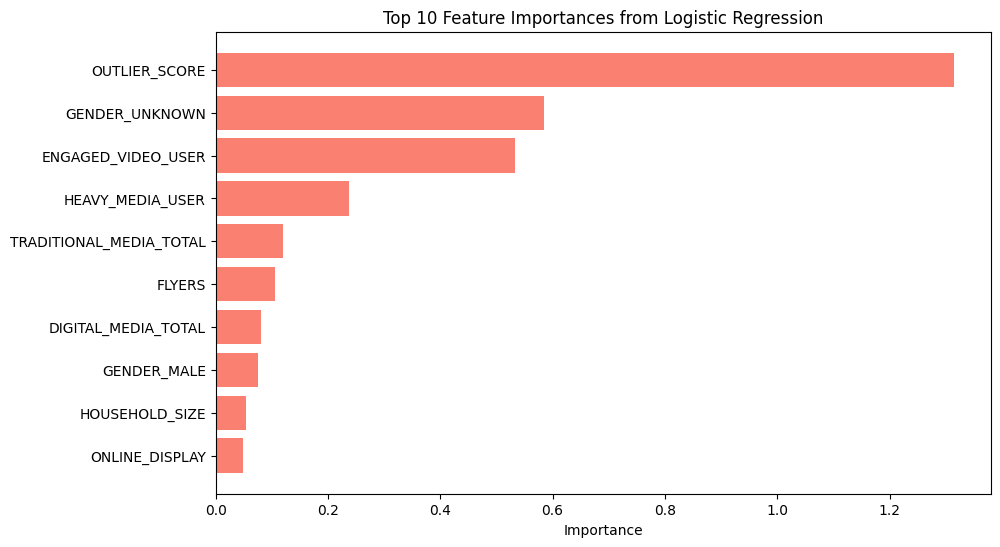

In [101]:
# Get feature importance (absolute coefficients)
feature_importance = np.abs(lr.coef_[0])

# Create a DataFrame to show features and their importance
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# print(importance_df)

# Plot the top 10 most important features
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10], color='salmon')
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances from Logistic Regression')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important features at the top
plt.show()

### Random Forrest

Random Forest is a good way of checking if dimentionality reduction is required sa the model does well even without it. If it scores better than other models it might be an argument for it.

In [102]:
# Train a random forest model
rf = RandomForestClassifier(random_state=42)

# Fit the model with sample weights
# rf.fit(X_train_scaled, y_train, sample_weight=w_train)

# Predict probabilities (probability of Purchase = 1)
# y_pred = rf.predict(X_test_scaled)
# y_pred = rf.predict_proba(X_test_scaled)[:, 1]  # Probability of positive class (Purchase = 1)

# Evaluate model (using ROC AUC score)
# print("ROC AUC Score:", roc_auc_score(y_test, y_pred, sample_weight=w_test))


In [103]:
# Initialize a random forest model
rf = RandomForestClassifier(n_estimators=200, random_state=42)

# Define the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [200, 400, 800],  # Number of trees
    'max_depth': [5, 10, 20],  # Max depth of trees
    'min_samples_split': [2, 5, 10],  # Min samples required to split an internal node
    'min_samples_leaf': [4, 8, 12],  # Min samples required to be at a leaf node
    'max_features': ['sqrt', 'log2'],  # Number of features to consider for the best split
}

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='roc_auc',  # Use ROC AUC as the evaluation metric
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all available processors
)

# Fit the model using training data and sample weights
grid_search.fit(X_train_scaled, y_train, sample_weight=w_train)

# Get the best model from GridSearchCV
best_rf = grid_search.best_estimator_

# Predict probabilities (probability of Purchase = 1) on test set
y_pred_proba = best_rf.predict_proba(X_test_scaled)[:, 1]

# Evaluate the best model using ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba, sample_weight=w_test)
print("Best Model ROC AUC Score:", roc_auc)

# Display best hyperparameters found by GridSearchCV
print("Best Hyperparameters:", grid_search.best_params_)

Best Model ROC AUC Score: 0.7322088358788876
Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 200}


In [104]:
# # Get feature importance
# feature_importance = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# # Plot the top features
# import matplotlib.pyplot as plt
# feature_importance[:10].plot(kind="barh")
# plt.title("Feature Importance from Random Forest")
# plt.show()

In [105]:
# # Get feature importance
# importance_df_rf = pd.DataFrame({
#     'Feature': X_train.columns,
#     'Importance': rf.feature_importances_
# })

# # Sort by importance
# importance_df_rf = importance_df_rf.sort_values(by='Importance', ascending=False)

# # print(importance_df_rf)

# # Plot the top 10 most important features
# plt.figure(figsize=(10, 6))
# plt.barh(importance_df_rf['Feature'][:10], importance_df_rf['Importance'][:10], color='skyblue')
# plt.xlabel('Importance')
# plt.title('Top 10 Feature Importances from Random Forest')
# plt.gca().invert_yaxis()  # Invert the y-axis to display the most important features at the top
# plt.show()

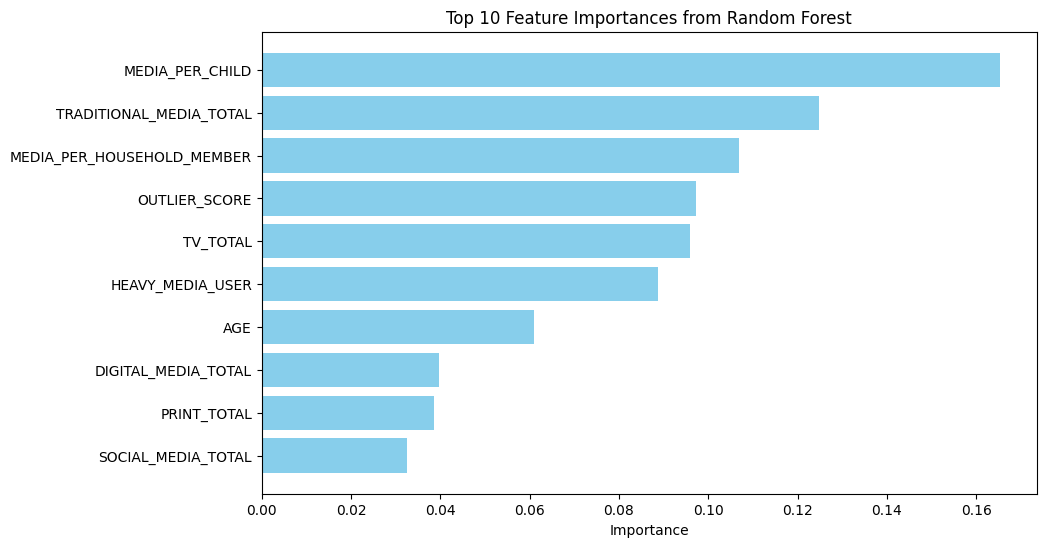

In [106]:
# Get feature importance
importance_df_rf = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_rf.feature_importances_
})

# Sort by importance
importance_df_rf = importance_df_rf.sort_values(by='Importance', ascending=False)

# print(importance_df_rf)

# Plot the top 10 most important features
plt.figure(figsize=(10, 6))
plt.barh(importance_df_rf['Feature'][:10], importance_df_rf['Importance'][:10], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances from Random Forest')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important features at the top
plt.show()

In [107]:
# # Select features with importance above a threshold (e.g., 0.01)
# selected_features = importance_df_rf[importance_df_rf["Importance"] > 0.03]["Feature"].tolist()

# # Filter dataset to keep only the most important features
# X_train_selected = X_train[selected_features]
# X_test_selected = X_test[selected_features]

# print(f"Selected Features ({len(selected_features)}): {selected_features}")

In [108]:
# # Initialize GridSearchCV with 5-fold cross-validation
# grid_search = GridSearchCV(
#     estimator=rf,
#     param_grid=param_grid,
#     scoring='roc_auc',  # Use ROC AUC as the evaluation metric
#     cv=5,  # 5-fold cross-validation
#     n_jobs=-1,  # Use all available processors
# )

# # Fit the model using training data and sample weights
# grid_search.fit(X_train_selected, y_train, sample_weight=w_train)

# # Get the best model from GridSearchCV
# best_rf = grid_search.best_estimator_

# # Predict probabilities (probability of Purchase = 1) on test set
# y_pred_proba = best_rf.predict_proba(X_test_selected)[:, 1]

# # Evaluate the best model using ROC AUC score
# roc_auc = roc_auc_score(y_test, y_pred_proba, sample_weight=w_test)
# print("Best Model ROC AUC Score:", roc_auc)

# # Display best hyperparameters found by GridSearchCV
# print("Best Hyperparameters:", grid_search.best_params_)

In [109]:
# X_train_filtered = X_train[selected_features]

In [128]:
from sklearn.feature_selection import SelectFromModel

# Select the most important features using SelectFromModel
selector = SelectFromModel(
    best_rf, 
    threshold="mean",
    # threshold=0.05
    )  # You can adjust the threshold
X_train_scaled_selected = selector.transform(X_train_scaled)  # X_selected now contains only the important features
X_test_scaled_selected = selector.transform(X_test_scaled)

X_train_scaled_selected.shape, X_test_scaled_selected.shape

((12838, 9), (3210, 9))

### XGBoost

In [129]:
import xgboost as xgb

# Convert to DMatrix format for XGBoost (including weights)
dtrain = xgb.DMatrix(X_train_scaled_selected, label=y_train, weight=w_train)
dtest = xgb.DMatrix(X_test_scaled_selected, label=y_test, weight=w_test)

# Train the model with binary logistic regression objective
params = {'objective': 'binary:logistic', 'eval_metric': 'logloss'}
xgb_model = xgb.train(params, dtrain, num_boost_round=100)

# Predict probabilities on the test set
y_pred_proba = xgb_model.predict(dtest)

# Evaluate model (using ROC AUC score)
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba, sample_weight=w_test))

ROC AUC Score: 0.6952252726862105


In [112]:
# Define the hyperparameter grid for tuning
param_grid = {
    'max_depth': [3, 5, 7, 10],  # Maximum depth of the tree
    'learning_rate': [0.01, 0.05, 0.1],  # Step size at each iteration while moving toward a minimum
    'n_estimators': [50, 100, 200],  # Number of boosting rounds
    'subsample': [0.8, 1.0],  # Fraction of samples used for each boosting round
    'colsample_bytree': [0.8, 1.0],  # Fraction of features used at each boosting round
    'gamma': [0, 0.1, 0.3],  # Minimum loss reduction required to make a further partition
}

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='roc_auc',  # Use ROC AUC as the evaluation metric
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all available processors
)

# Fit the model with training data and sample weights
grid_search.fit(X_train_scaled_selected, y_train, sample_weight=w_train)

# Get the best model from GridSearchCV
best_xgb_model = grid_search.best_estimator_

# Predict probabilities on the test set
y_pred_proba = best_xgb_model.predict_proba(X_test_scaled_selected)[:, 1]

# Evaluate the best model using ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba, sample_weight=w_test)
print("Best Model ROC AUC Score:", roc_auc)

# Display the best hyperparameters found by GridSearchCV
print("Best Hyperparameters:", grid_search.best_params_)

In [113]:
# Get feature importance (from XGBoost)
# importance_df_xgb = pd.DataFrame({
#     'Feature': X_train.columns,
#     'Importance': xgb_model.get_score(importance_type='weight').values()  # Or use 'gain' if preferred
# })

# # Sort by importance
# importance_df_xgb = importance_df_xgb.sort_values(by='Importance', ascending=False)

# # Plot the top 10 most important features
# plt.figure(figsize=(10, 6))
# plt.barh(importance_df_xgb['Feature'][:10], importance_df_xgb['Importance'][:10], color='skyblue')
# plt.xlabel('Importance')
# plt.title('Top 10 Feature Importances from XGBoost')
# plt.gca().invert_yaxis()  # Invert the y-axis to display the most important features at the top
# plt.show()

### SVM

In [114]:
# Initialize the SVM model with probability estimation
svm_model = SVC(probability=True, kernel="linear", random_state=42)

# Fit the model with sample weights
svm_model.fit(X_train_scaled_selected, y_train, sample_weight=w_train)

# Predict probabilities (probability of Purchase = 1)
y_pred_proba = svm_model.predict_proba(X_test_scaled)[:, 1]  # Probability of positive class (Purchase = 1)

# Evaluate model (using ROC AUC score)
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba, sample_weight=w_test))

In [115]:
# # Define the hyperparameter grid for tuning SVM
# param_grid = {
#     'C': [0.1, 1, 10, 100],  # Regularization parameter
#     'kernel': ['linear', 'rbf'],  # Kernel types
#     'gamma': ['scale', 'auto', 0.1, 1],  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
#     'degree': [3, 4, 5],  # Degree of the polynomial kernel (only relevant for 'poly')
#     'class_weight': ['balanced'],  # Handle class imbalance
# }

# # Initialize the SVM model
# svm_model = SVC(probability=True, random_state=42)

# # Initialize GridSearchCV
# grid_search_svm = GridSearchCV(
#     estimator=svm_model,
#     param_grid=param_grid,
#     scoring='roc_auc',  # Use ROC AUC as the evaluation metric
#     cv=5,  # 5-fold cross-validation
#     n_jobs=-1,  # Use all available processors
# )

# # Fit the model with training data and sample weights
# grid_search_svm.fit(X_train_scaled, y_train, sample_weight=w_train)

# # Get the best model from GridSearchCV
# best_svm_model = grid_search_svm.best_estimator_

# # Predict probabilities on the test set
# y_pred_proba_svm = best_svm_model.predict_proba(X_test_scaled)[:, 1]

# # Evaluate the best model using ROC AUC score
# roc_auc_svm = roc_auc_score(y_test, y_pred_proba_svm, sample_weight=w_test)
# print("Best SVM Model ROC AUC Score:", roc_auc_svm)

# # Display the best hyperparameters found by GridSearchCV
# print("Best Hyperparameters for SVM:", grid_search_svm.best_params_)